In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation, real_data_loading2
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

import tensorflow as tf

import os

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = "2"
config = tf.compat.v1.ConfigProto() # Another Version: config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [3]:
## Data loading
data_name = 'stock'
seq_len = 24
percentage = 0.15 # 10% observed data

if data_name in ['stock', 'energy']:
    ori_data = real_data_loading2(data_name, seq_len, percentage)
else:
    print("Data Loading Wrong!!!!")
print(data_name + ' dataset is ready.')

stock dataset is ready.


In [4]:
print("The new observed data shape: ", np.array(ori_data).shape)

The new observed data shape:  (529, 24, 6)


In [5]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24 # 4 times of the data dimension
parameters['num_layer'] = 3
parameters['iterations'] = 5000
parameters['batch_size'] = 128

In [6]:
# Run TimeGAN
generated_data = timegan(ori_data, parameters)   
print('Finish Synthetic Data Generation')





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons


2021-08-16 11:55:46.008336: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-08-16 11:55:46.053471: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-PCIE-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.38
pciBusID: 0000:af:00.0
2021-08-16 11:55:46.053678: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-08-16 11:55:46.054866: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-08-16 11:55:46.055956: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-08-16 11:55:46.056238: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2021-08-16 11:55:46.057635: I tensorflow/stream_executor/platfo

Start Embedding Network Training


2021-08-16 11:55:48.786171: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0


step: 0/5000, e_loss: 0.2637
step: 1000/5000, e_loss: 0.0438
step: 2000/5000, e_loss: 0.0159
step: 3000/5000, e_loss: 0.0122
step: 4000/5000, e_loss: 0.0102
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/5000, s_loss: 0.2194
step: 1000/5000, s_loss: 0.0465
step: 2000/5000, s_loss: 0.045
step: 3000/5000, s_loss: 0.0426
step: 4000/5000, s_loss: 0.0389
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/5000, d_loss: 2.0631, g_loss_u: 0.6754, g_loss_s: 0.0492, g_loss_v: 0.3947, e_loss_t0: 0.1024
step: 1000/5000, d_loss: 1.7717, g_loss_u: 1.3424, g_loss_s: 0.0394, g_loss_v: 0.0246, e_loss_t0: 0.0088
step: 2000/5000, d_loss: 1.4759, g_loss_u: 1.3698, g_loss_s: 0.0427, g_loss_v: 0.0205, e_loss_t0: 0.0079
step: 3000/5000, d_loss: 1.5206, g_loss_u: 1.4196, g_loss_s: 0.0437, g_loss_v: 0.0447, e_loss_t0: 0.0062
step: 4000/5000, d_loss: 1.2375, g_loss_u: 1.4956, g_loss_s: 0.0419, g_loss_v: 0.0335, e_loss_t0: 0.0051
Finish Joint Training
Finis

In [7]:
filename = data_name + "_data_TimeGAN_5000_sce2-2-0-015.npy"
np.save(filename, generated_data)

In [8]:
generated_data.shape

(391989, 24, 6)

In [9]:
generated_data[0][0]

array([0.48245731, 0.49751863, 0.46929866, 0.47130147, 0.47281337,
       0.37220716])

In [10]:
metric_iteration = 5

predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

Instructions for updating:
Please use tf.global_variables instead.



2021-08-16 13:26:39.741946: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-PCIE-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.38
pciBusID: 0000:af:00.0
2021-08-16 13:26:39.742036: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-08-16 13:26:39.742051: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-08-16 13:26:39.742063: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-08-16 13:26:39.742075: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2021-08-16 13:26:39.742084: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10.0
2021-08-16 13:26:39.742096: I tensorflow/stream_executor

Predictive score: 0.1045


In [11]:
print("all the predictive scores: ", predictive_score)
print('Predictive score avg. value: ' + str(np.round(np.mean(predictive_score), 4)))
print('Predictive score std. value: ' + str(np.round(np.std(predictive_score), 4)))

all the predictive scores:  [0.10588884753325531, 0.10588889552497482, 0.09851765624619975, 0.10623331480318118, 0.1060304917668854]
Predictive score avg. value: 0.1045
Predictive score std. value: 0.003


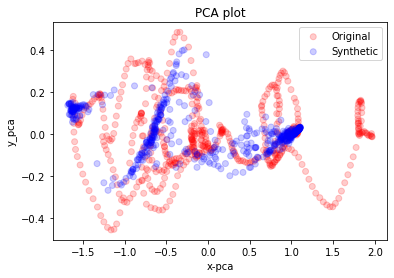

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1058 samples in 0.000s...
[t-SNE] Computed neighbors for 1058 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1058
[t-SNE] Computed conditional probabilities for sample 1058 / 1058
[t-SNE] Mean sigma: 0.053401
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.460445
[t-SNE] KL divergence after 300 iterations: 0.584834


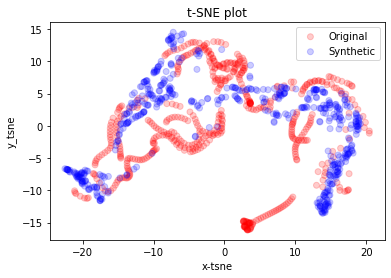

In [12]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')

In [13]:
!mv ./pca-results-stock-scre2-2-0-005.png ./figures_timegan_sce2
!mv ./tsne-results-stock-scre2-2-0-005.png ./figures_timegan_sce2

mv: cannot stat './pca-results-stock-scre2-2-0-005.png': No such file or directory
mv: cannot stat './tsne-results-stock-scre2-2-0-005.png': No such file or directory
